In [1]:
# @toffanetto

import k_nn_classification as knn 
import matplotlib.pyplot as plt
import numpy as np

/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train, classes_rate_train = knn.getData(train=True, raw= True)

Y_data = [X_train, y_train]

# Getting test data
X_test, y_test, classes_rate_test = knn.getData(train=False, raw= True)

Y_test = [X_test, y_test]

In [ ]:
k, ba = knn.kFoldValidation(x=X_train, y=y_train, k=4, classes_rate=classes_rate_train)

np.save('../model/knn/raw_data/ba_kfold.npy', ba)
np.save('../model/knn/raw_data/k_kfold.npy', k)

In [6]:
k = np.load('../model/knn/raw_data/k_kfold.npy')

print(k)

ba_avg = [(ba[0][i]+ba[1][i]+ba[2][i]+ba[3][i])/4 for i in range(30)]

print('ba_avg = '+str(ba_avg))

k_optimal = np.argmax(ba_avg)

print('k_optimal = '+str(k_optimal))

[2 2 2 1]
ba_avg = [0.0, 0.6339317451337133, 0.6418333819293478, 0.6039586917933324, 0.5945067108946003, 0.5812253048433842, 0.569039402938083, 0.5498583649782502, 0.5407035144780847, 0.5294060640339872, 0.5202711443385662, 0.5128038357181591, 0.504827148223428, 0.49740180245787047, 0.48975929102981397, 0.4874981510526616, 0.47712199974667463, 0.47172782902353105, 0.46356782321463, 0.4617637463292828, 0.4543451829725147, 0.4509820752074255, 0.44726860814349007, 0.44465262487368196, 0.4429961545812992, 0.4413134496667968, 0.43702228153585293, 0.4352835723068478, 0.43049230451266546, 0.4287221980649147]
k_optimal = 2


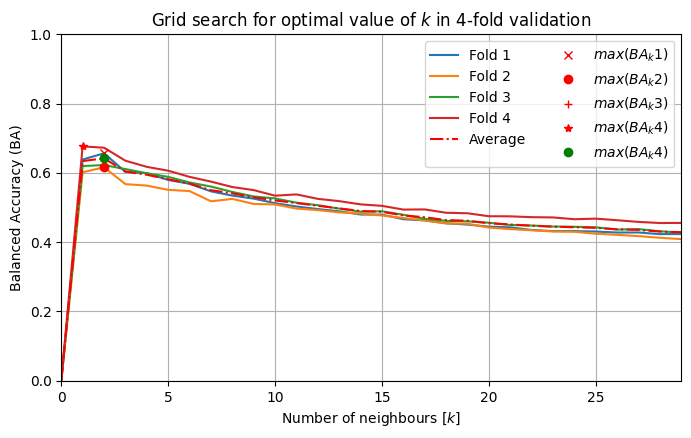

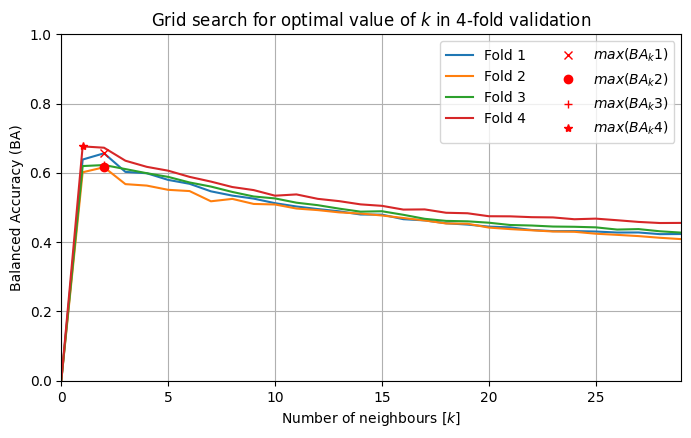

In [11]:
try:
    ba
    k
except:
    ba = np.load('../model/knn/raw_data/ba_kfold.npy')
    k = np.load('../model/knn/raw_data/k_kfold.npy')
    
n = np.linspace(0,29,30)

plt.figure(figsize=(8,4.5))
plt.plot(n,ba[0],label=f'Fold 1')
plt.plot(n,ba[1],label=f'Fold 2')
plt.plot(n,ba[2],label=f'Fold 3')
plt.plot(n,ba[3],label=f'Fold 4')
plt.plot(n,ba_avg,'-.r',label=f'Average')
plt.plot(k[0],max(ba[0]),'xr',label=f'$max(BA_k1)$',linewidth=5)
plt.plot(k[1],max(ba[1]),'or',label=f'$max(BA_k2)$',linewidth=5)
plt.plot(k[2],max(ba[2]),'+r',label=f'$max(BA_k3)$',linewidth=5)
plt.plot(k[3],max(ba[3]),'*r',label=f'$max(BA_k4)$',linewidth=5)
plt.plot(k_optimal,max(ba_avg),'og',label=f'$max(BA_k4)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$ in 4-fold validation')
plt.legend(ncol=2)
plt.grid()
plt.xlim([0, 29])
plt.ylim([0, 1])

plt.savefig('../plot/knn_2/grid_search_k_fold-k_optimal.pdf', format="pdf", bbox_inches="tight")

plt.figure(figsize=(8,4.5))
plt.plot(n,ba[0],label=f'Fold 1')
plt.plot(n,ba[1],label=f'Fold 2')
plt.plot(n,ba[2],label=f'Fold 3')
plt.plot(n,ba[3],label=f'Fold 4')
plt.plot(k[0],max(ba[0]),'xr',label=f'$max(BA_k1)$',linewidth=5)
plt.plot(k[1],max(ba[1]),'or',label=f'$max(BA_k2)$',linewidth=5)
plt.plot(k[2],max(ba[2]),'+r',label=f'$max(BA_k3)$',linewidth=5)
plt.plot(k[3],max(ba[3]),'*r',label=f'$max(BA_k4)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$ in 4-fold validation')
plt.legend(ncol=2)
plt.grid()
plt.xlim([0, 29])
plt.ylim([0, 1])

plt.savefig('../plot/knn_2/grid_search_k_fold.pdf', format="pdf", bbox_inches="tight")


In [8]:
y_hat = knn.classify(x=Y_test[0], Y=Y_data, y_label=Y_test[1], k=k_optimal)

np.save('../model/knn/raw_data/y_hat_k_'+str(k_optimal)+'.npy', y_hat)

In [13]:
try:
    y_hat
except:
    y_hat = np.load('../model/knn/raw_data/y_hat.npy')

confusion_matrix, ba_optimal = knn.rateModel(y=Y_test[1].T[0], y_hat=y_hat, classes_rate=classes_rate_test)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('\nBA = '+str(ba_optimal))

Confusion Matrix: 
[[355.   6.   1.  25.  98.  11.]
 [  7. 343.   0.  35.  71.  15.]
 [ 11.  17. 121.  69. 135.  67.]
 [  0.   0.   0. 441.  16.  34.]
 [  0.   0.   0. 176. 311.  45.]
 [  0.   0.   0. 217.  38. 282.]]

BA = 0.6233253289264621
1	0.7157	0.9517
2	0.7282	0.9372
3	0.2881	0.9918
4	0.8982	0.4579
5	0.5846	0.4649
6	0.5251	0.6211


In [10]:
score = knn.confusionMatrixExtract(confusion_matrix=confusion_matrix)

for i in range(1,7):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))

1	0.7157	0.9517
2	0.7282	0.9372
3	0.2881	0.9918
4	0.8982	0.4579
5	0.5846	0.4649
6	0.5251	0.6211
